Задача:

Изучив массив страховых случаев ОСАГО (есть виновник и пострадавший), с помощью графов найти подозрительные ДТП и высокоубыточных клиентов.

In [ ]:
!pip install networkx matplotlib openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
claims = pd.read_excel("claims.xlsx")

In [7]:
claims.head()

,num_claims,guilty,victim
0,1,Беляев Владислав Аркадьевич,Ефимов Малик Константинович
1,2,Давыдова Ануш Оскаровна,Никифорова Божена Львовна
2,3,Белов Сергей Михайлович,Третьяков Никита Харитонович
3,4,Власов Артём Михайлович,Аксенова Вероника Кузьминична
4,5,Яковлев Алан Макарович,Сысоев Елисей Тимофеевич


In [8]:
claims.shape

(261, 3)

In [9]:
graph = nx.DiGraph()
src_graph = claims.drop("num_claims", axis=1).to_records(index=False)
graph.add_edges_from(src_graph)

In [10]:
%matplotlib inline

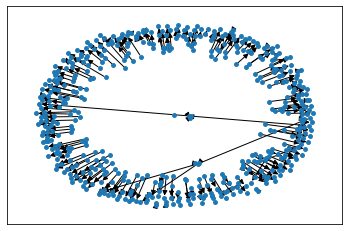

In [11]:
nx.draw_networkx(graph, node_size=15, with_labels=False)

In [12]:
degrees = list(graph.degree)
degrees.sort(key=lambda x: x[1], reverse=True)

In [13]:
degrees[:15]

[('Дорофеева Гулия Николаевна', 5),
 ('Котова Виктория Архиповна', 3),
 ('Мамонтов Мстислав Георгиевич', 3),
 ('Мухамадеев Александр Валерьевич', 2),
 ('Сенчукова Екатерина Семеновна', 2),
 ('Комин Сергей Николаевич', 2),
 ('Павлова Мария Геннадиевна', 2),
 ('Воробьев Иван Александрович', 2),
 ('Рогачев Антон Владимирович', 2),
 ('Коробов Вадим Александрович', 2),
 ('Стрелков Евгений Егорович', 2),
 ('Беляев Владислав Аркадьевич', 1),
 ('Ефимов Малик Константинович', 1),
 ('Давыдова Ануш Оскаровна', 1),
 ('Никифорова Божена Львовна', 1)]

In [14]:
sgraph = nx.Graph()
sgraph.add_edges_from(src_graph)

In [15]:
raw_components = sorted(nx.connected_components(sgraph), key=len, reverse=True)
raw_components[:10]

[{'Галкина Елена Тарасовна',
  'Дорофеева Гулия Николаевна',
  'Елисеева Сати Вячеславовна',
  'Миронов Пётр Александрович',
  'Пахомов Анатолий Васильевич',
  'Шубин Всеволод Валерьевич'},
 {'Королева Радмила Олеговна',
  'Котова Виктория Архиповна',
  'Петухова Медина Максимовна',
  'Цветков Валерий Ростиславович'},
 {'Коробов Вадим Александрович',
  'Мухамадеев Александр Валерьевич',
  'Рогачев Антон Владимирович',
  'Сенчукова Екатерина Семеновна'},
 {'Архипова Анна Игоревна',
  'Мамонтов Мстислав Георгиевич',
  'Суворов Илья Макарович',
  'Федотов Ростислав Богуславович'},
 {'Воробьев Иван Александрович',
  'Комин Сергей Николаевич',
  'Павлова Мария Геннадиевна'},
 {'Александрова Лариса Евгеньевна',
  'Силина Радмила Викторовна',
  'Стрелков Евгений Егорович'},
 {'Беляев Владислав Аркадьевич', 'Ефимов Малик Константинович'},
 {'Давыдова Ануш Оскаровна', 'Никифорова Божена Львовна'},
 {'Белов Сергей Михайлович', 'Третьяков Никита Харитонович'},
 {'Аксенова Вероника Кузьминична', '

In [16]:
cc_subgraphs = sorted((sgraph.subgraph(c) for c in nx.connected_components(sgraph)), key=len, reverse=True)



Подозрительный

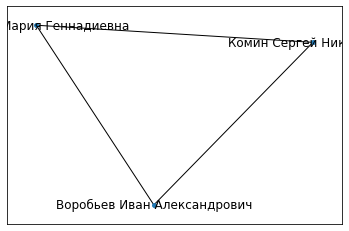

In [21]:
nx.draw_networkx(cc_subgraphs[4], node_size=15)

Высокоубыточный 

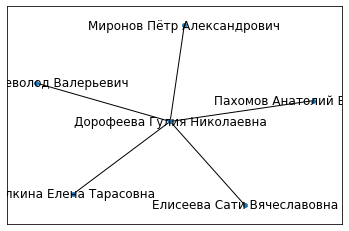

In [18]:

nx.draw_networkx(cc_subgraphs[0], node_size=15)